In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
import tensorflow_probability as tfp
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt

In [ ]:
# DATA=[]
# for folder,mask in zip((os.listdir('/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/capsnet-keras/Original')),
#   os.listdir('/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/Segmented')):
#   for file_im,file_mask in zip(os.listdir(f'/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/capsnet-keras/Original/{folder}'),
#     os.listdir(f'/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/Segmented/{mask}')
#                                ):
#     img=cv2.imread(f'/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/capsnet-keras/Original/{folder}/{file_im}')
#     img=cv2.resize(img,(128,128))
#     mk=cv2.imread(f'/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/Segmented/{mask}/{file_mask}')
#     mk=cv2.resize(mk,(128,128))
#     DATA.append((img/255.0,mk/255.0))
# DATA=np.array(DATA)
# DATA=shuffle(DATA)

In [ ]:
IMAGES_DATA=[]
for label,folder in enumerate(os.listdir('/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/capsnet-keras/Original')):
  for file in os.listdir(f'/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/capsnet-keras/Original/{folder}'):
    img=cv2.imread(f'/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/capsnet-keras/Original/{folder}/{file}')
    img=cv2.resize(img,(128,128))
    IMAGES_DATA.append((img,label))
IMAGES_DATA=np.array(IMAGES_DATA)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


In [ ]:
IMAGES_DATA.shape

(3256, 2)

In [ ]:
mask_DATA=[]
for label,mask in enumerate(os.listdir('/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/Segmented')):
  for mask_file in os.listdir(f'/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/Segmented/{mask}'):
    img=cv2.imread(f'/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/Segmented/{mask}/{mask_file}')
    img=cv2.resize(img,(128,128))
    mask_DATA.append((np.round(img),label))
mask_DATA=np.array(mask_DATA)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


In [ ]:
mask_DATA.shape

(3256, 2)

In [ ]:
DATA=np.array([(image,mask,label) for image,mask,label in zip(IMAGES_DATA[:,0],mask_DATA[:,0],IMAGES_DATA[:,1])])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
DATA=shuffle(DATA)

In [ ]:
DATA.shape

(3256, 3)

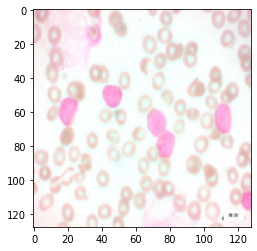

In [ ]:
plt.imshow( DATA[:,0][0])

In [ ]:
IMAGES=np.array([ i for i in DATA[:,0]]).reshape(3256,128,128,3)
MASKS=np.array([ i for i in DATA[:,1]]).reshape(3256,128,128,3)
LABEL=DATA[:,2]

In [ ]:
IMAGES.shape

(3256, 128, 128, 3)

In [ ]:
MASKS.shape

(3256, 128, 128, 3)

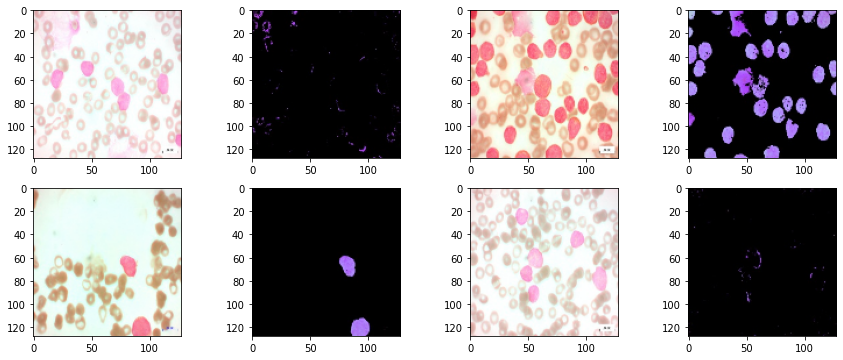

In [ ]:
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(2,4,1)
plt.imshow(IMAGES[0])
plt.subplot(2,4,2)
plt.imshow(MASKS[0])
plt.subplot(2,4,3)
plt.imshow(IMAGES[190])
plt.subplot(2,4,4)
plt.imshow(MASKS[190])
plt.subplot(2,4,5)
plt.imshow(IMAGES[230])
plt.subplot(2,4,6)
plt.imshow(MASKS[230])
plt.subplot(2,4,7)
plt.imshow(IMAGES[2310])
plt.subplot(2,4,8)
plt.imshow(MASKS[2310])

plt.show()

In [ ]:
x_train,x_test,x_label,y_label=IMAGES[:2600],IMAGES[2600:],LABEL[:2600],LABEL[2600:]
y_train,y_test=np.round(MASKS[:2600]),np.round(MASKS[2600:])

In [ ]:
y_test[10].max()

255

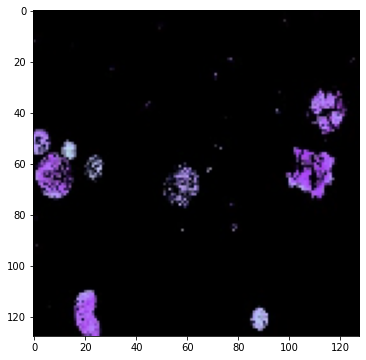

In [ ]:
plt.imshow((y_test[10]/255.0))

In [ ]:
x_train=x_train.reshape(2600,128,128,3)/255.0
x_test=x_test.reshape(656,128,128,3)/255.0
y_train=y_train.reshape(2600,128,128,3)/255.0
y_test=y_test.reshape(656,128,128,3)/255.0

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2600, 128, 128, 3),
 (656, 128, 128, 3),
 (2600, 128, 128, 3),
 (656, 128, 128, 3))

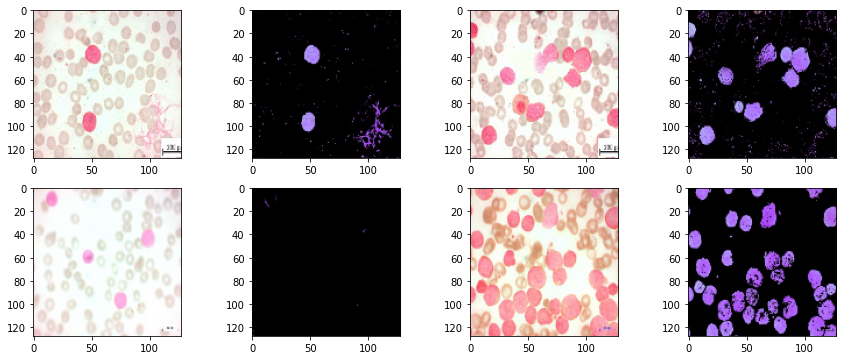

In [ ]:
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(2,4,1)
plt.imshow(x_train[1183].reshape(128,128,3))
plt.subplot(2,4,2)
plt.imshow(y_train[1183].reshape(128,128,3))
plt.subplot(2,4,3)
plt.imshow(x_train[157].reshape(128,128,3))
plt.subplot(2,4,4)
plt.imshow(y_train[157].reshape(128,128,3))
plt.subplot(2,4,5)
plt.imshow(x_train[768].reshape(128,128,3))
plt.subplot(2,4,6)
plt.imshow(y_train[768].reshape(128,128,3))
plt.subplot(2,4,7)
plt.imshow(x_train[2100].reshape(128,128,3))
plt.subplot(2,4,8)
plt.imshow(y_train[2100].reshape(128,128,3))

plt.show()

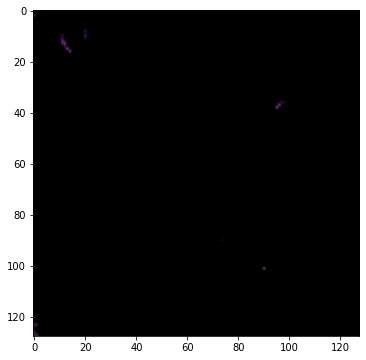

In [ ]:
plt.imshow(y_train[768].reshape(128,128,3)*x_train[768].reshape(128,128,3))

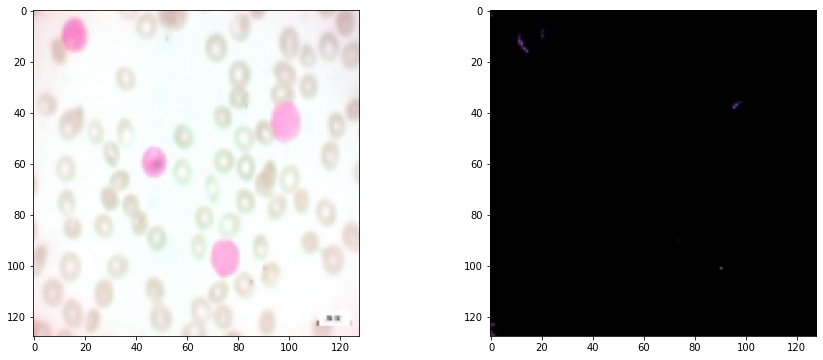

In [ ]:
plt.subplot(1,2,1)
plt.imshow( x_train[768])
plt.subplot(1,2,2)
plt.imshow( y_train[768])
plt.show()

## Variational AutoEncoder

In [ ]:
img_size = 128
num_channels = 3
latent_space_dim=3
prior = tfp.distributions.Independent(tfp.distributions.Normal(loc=tf.zeros(latent_space_dim), scale=1),
                        reinterpreted_batch_ndims=1)

In [ ]:
x = keras.layers.Input(shape=(img_size, img_size, num_channels), name="encoder_input")

encoder_conv_layer1 = keras.layers.Conv2D(filters=4, kernel_size=(3, 3),activation='relu', padding="same", strides=1, name="encoder_conv_1")(x)
encoder_conv_layer2 = keras.layers.Conv2D(filters=8, kernel_size=(3,3),activation='relu', padding="same", strides=1, name="encoder_conv_2")(encoder_conv_layer1)
encoder_norm_layer2 = keras.layers.BatchNormalization(name="encoder_norm_2")(encoder_conv_layer2)

encoder_conv_layer3 = keras.layers.Conv2D(filters=16, kernel_size=(3,3),activation='relu', padding="same", strides=2, name="encoder_conv_3")(encoder_norm_layer2)
encoder_conv_layer4 = keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", strides=2, name="encoder_conv_4")(encoder_conv_layer3)
encoder_norm_layer4 = keras.layers.BatchNormalization(name="encoder_norm_4")(encoder_conv_layer4)

encoder_conv_layer5 = keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=1, name="encoder_conv_5")(encoder_norm_layer4)

shape_before_flatten = keras.backend.int_shape(encoder_conv_layer5)[1:]
encoder_flatten = keras.layers.Flatten()(encoder_conv_layer5)
enc_dense_1=keras.layers.Dense(64,activation='relu')(encoder_flatten)
enc_dense_2=keras.layers.Dense(32,activation='relu')(enc_dense_1)

distribution=keras.layers.Dense(tfp.layers.MultivariateNormalTriL.params_size(latent_space_dim),
               activation='sigmoid')(enc_dense_2)
encoder_output=tfp.layers.MultivariateNormalTriL(
        latent_space_dim,activity_regularizer=tfp.layers.KLDivergenceRegularizer(prior))(distribution)

encoder = keras.models.Model(x, encoder_output, name="encoder_model")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


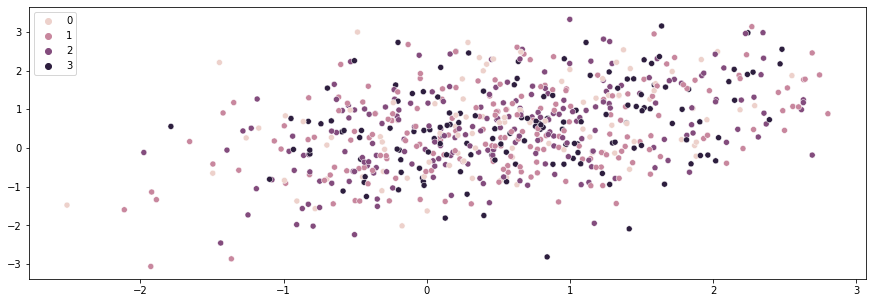

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize']=(15,5)
encoded=encoder(x_test).sample()
class_names=np.array([0,1,2,3])
sns.scatterplot(encoded[:,0],encoded[:,1],hue=class_names[np.array(y_label,dtype=np.int)])
plt.show()

In [ ]:
decoder_input = keras.layers.Input(shape=(latent_space_dim), name="decoder_input")
decoder_dense_layer1 = keras.layers.Dense(units=np.prod(shape_before_flatten), name="decoder_dense_1")(decoder_input)
decoder_reshape = keras.layers.Reshape(target_shape=shape_before_flatten)(decoder_dense_layer1)

decoder_conv_tran_layer1 = keras.layers.Conv2DTranspose(filters=16, kernel_size=(3, 3),activation='relu', padding="same", strides=1, name="decoder_conv_tran_1")(decoder_reshape)
decoder_norm_layer1 = keras.layers.BatchNormalization(name="decoder_norm_1")(decoder_conv_tran_layer1)

decoder_conv_tran_layer2 = keras.layers.Conv2DTranspose(filters=32, kernel_size=(3, 3),activation='relu', padding="same", strides=2, name="decoder_conv_tran_2")(decoder_norm_layer1)
decoder_norm_layer2 = keras.layers.BatchNormalization(name="decoder_norm_2")(decoder_conv_tran_layer2)

decoder_conv_tran_layer3 = keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3),activation='relu', padding="same", strides=2, name="decoder_conv_tran_3")(decoder_norm_layer2)
decoder_norm_layer3 = keras.layers.BatchNormalization(name="decoder_norm_3")(decoder_conv_tran_layer3)

last = keras.layers.Conv2DTranspose(filters=3, kernel_size=(3, 3),activation='sigmoid', padding="same", strides=1, name="decoder_conv_tran_4")(decoder_norm_layer3)
decoder_distribution=tfp.layers.DistributionLambda(lambda t: tfp.distributions.Bernoulli(t))(last)
decoder = keras.models.Model(decoder_input, decoder_distribution, name="decoder_model")

In [ ]:
vae_input = keras.layers.Input(shape=(img_size, img_size, num_channels), name="VAE_input")

In [ ]:
vae_encoder_output = encoder(vae_input)

In [ ]:
vae_decoder_output = decoder(vae_encoder_output)

In [ ]:
vae = keras.models.Model(vae_input, vae_decoder_output, name="VAE")

In [ ]:

from keras import backend as K
def dice_coeff(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)
  return 1 - numerator / denominator
def NLL(y_true,y_pred):
  return -y_pred.log_prob(y_true)
vae.compile(optimizer=keras.optimizers.Adam(lr=0.001), 
            loss=NLL,metrics=[dice_coeff])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
hist=vae.fit(x_train, y_train, epochs=10)

Epoch 1/10
82/82 [==============================] - 8s 66ms/step - loss: 2.3662 - dice_coeff: 0.8843
Epoch 2/10
82/82 [==============================] - 5s 64ms/step - loss: 2.2926 - dice_coeff: 0.8845
Epoch 3/10
82/82 [==============================] - 5s 64ms/step - loss: 2.3579 - dice_coeff: 0.8849
Epoch 4/10
82/82 [==============================] - 5s 64ms/step - loss: 2.1813 - dice_coeff: 0.8843
Epoch 5/10
82/82 [==============================] - 5s 64ms/step - loss: 2.3234 - dice_coeff: 0.8852
Epoch 6/10
82/82 [==============================] - 5s 64ms/step - loss: 2.2964 - dice_coeff: 0.8847
Epoch 7/10
82/82 [==============================] - 5s 64ms/step - loss: 2.5749 - dice_coeff: 0.8843
Epoch 8/10
82/82 [==============================] - 5s 64ms/step - loss: 2.1465 - dice_coeff: 0.8848
Epoch 9/10
82/82 [==============================] - 5s 64ms/step - loss: 2.2346 - dice_coeff: 0.8849
Epoch 10/10
82/82 [==============================] - 5s 64ms/step - loss: 2.3316 - dice_coe

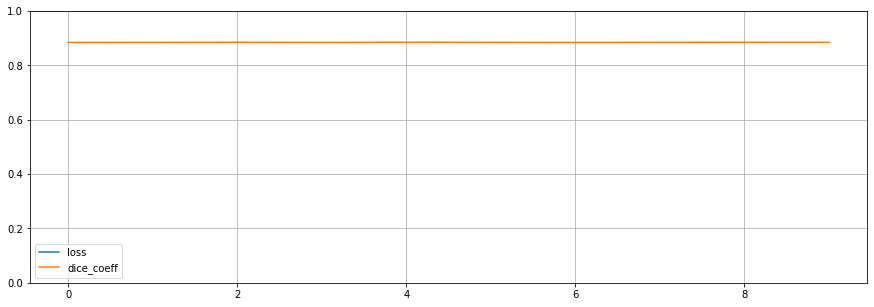

In [ ]:
pd.DataFrame(hist.history).plot()
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
vae.evaluate(x_test,y_test)

21/21 [==============================] - 1s 31ms/step - loss: 1.8991 - dice_coeff: 0.8861


[1.8990874290466309, 0.886060357093811]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


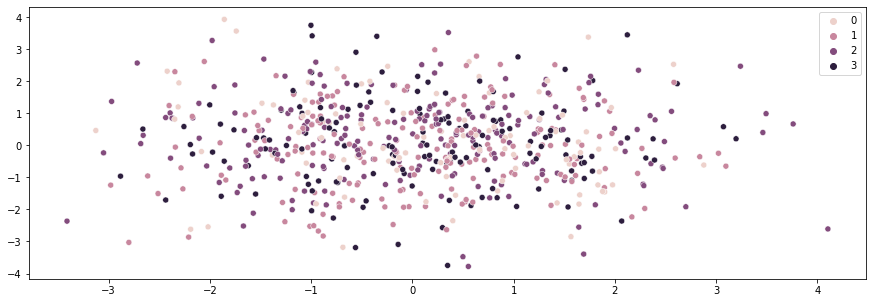

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize']=(15,5)
encoded=encoder(x_test).sample()
class_names=np.array([0,1,2,3])
sns.scatterplot(encoded[:,0],encoded[:,1],hue=class_names[np.array(y_label,dtype=np.int)])
plt.show()

In [ ]:
preds=vae(x_test).sample()

In [ ]:
preds

array([[[[1, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 1],
         [0, 0, 0],
         [0, 0, 1]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [1, 0, 1],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 1],
         ...,
         [1, 0, 0],
         [0, 0, 1],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 1]],

        [[0, 0, 1],
         [0,

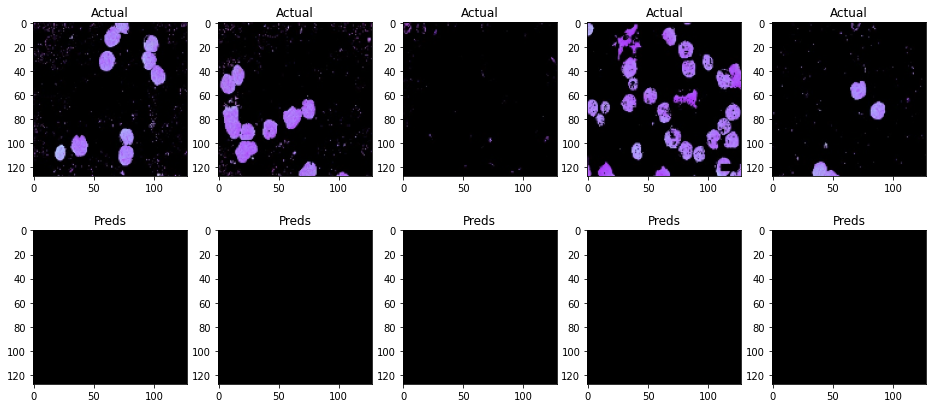

In [ ]:
plt.rcParams['figure.figsize']=(16,7)
for i in range(5):
  plt.subplot(2,5,i+1)
  plt.imshow((x_test[i] ))
  plt.title('Actual')
  plt.subplot(2,5,i+6)
  plt.imshow(preds[i] )
  plt.title('Preds')
plt.show()

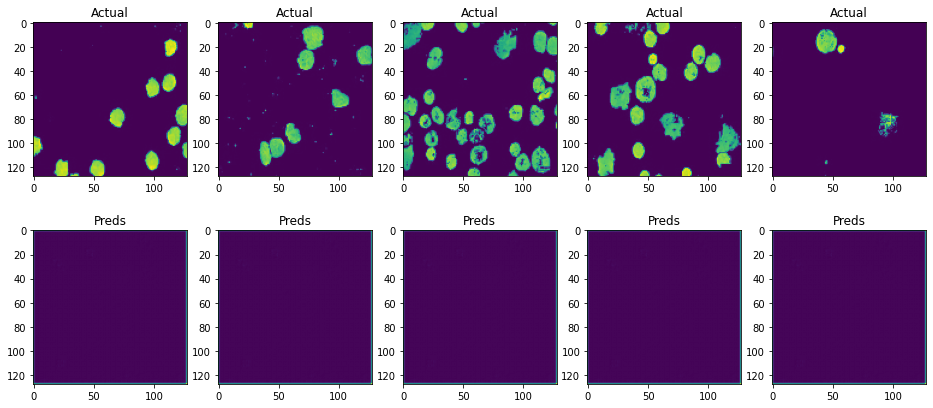

In [ ]:
plt.rcParams['figure.figsize']=(16,7)
for i in range(5):
  plt.subplot(2,5,i+1)
  plt.imshow((y_test[i+68] ))
  plt.title('Actual')
  plt.subplot(2,5,i+6)
  plt.imshow(preds[i+68])
  plt.title('Preds')
plt.show()

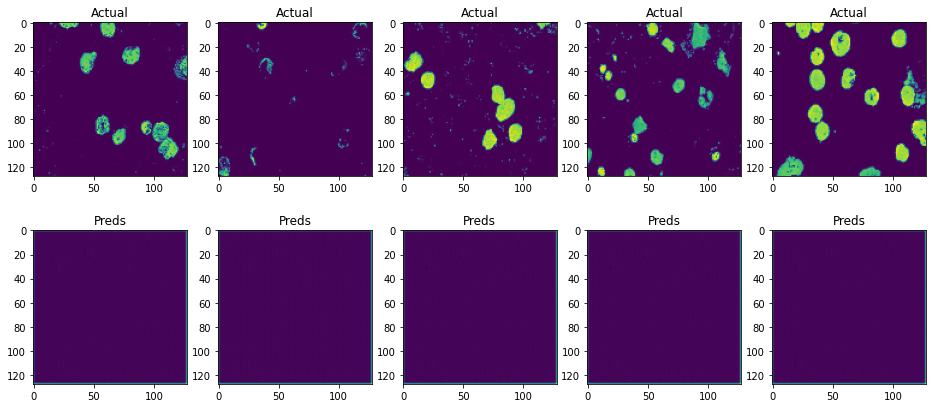

In [ ]:
plt.rcParams['figure.figsize']=(16,7)
for i in range(5):
  plt.subplot(2,5,i+1)
  plt.imshow((y_test[i+127]).reshape(128,128))
  plt.title('Actual')
  plt.subplot(2,5,i+6)
  plt.imshow(np.array(preds[i+127]).reshape(128,128))
  plt.title('Preds')
plt.show()

## Sagment

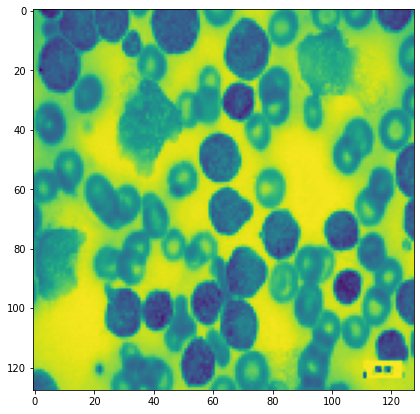

In [ ]:
plt.imshow(x_test[11].reshape(128,128))

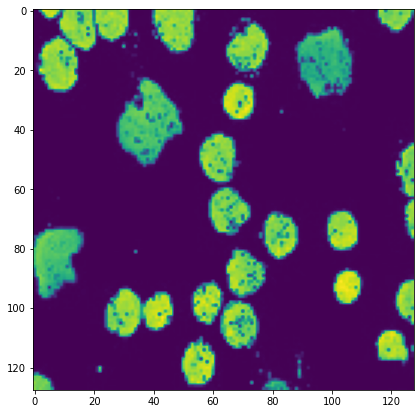

In [ ]:
plt.imshow(y_test[11].reshape(128,128))

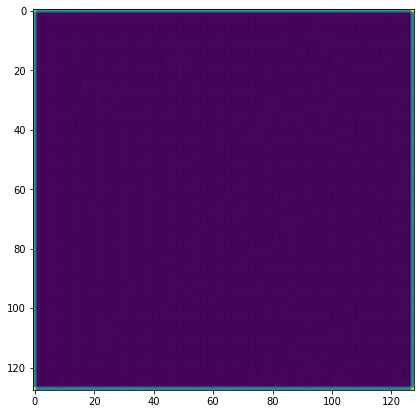

In [ ]:
plt.imshow(preds[11].reshape(128,128))

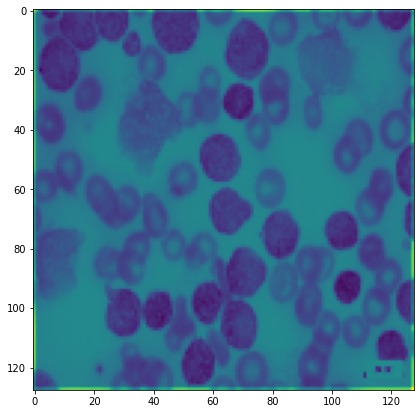

In [ ]:
plt.imshow(((preds[11].reshape(128,128))*x_test[11].reshape(128,128)))

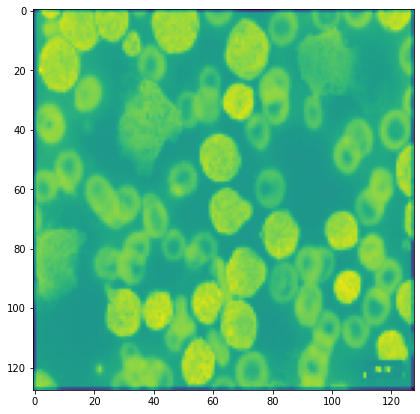

In [ ]:
plt.imshow(1-(preds[11].reshape(128,128)*x_test[11].reshape(128,128)))

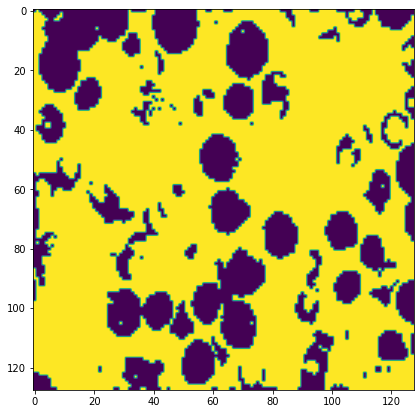

In [ ]:
plt.imshow(np.round(x_test[11].reshape(128,128)-preds[11].reshape(128,128)))

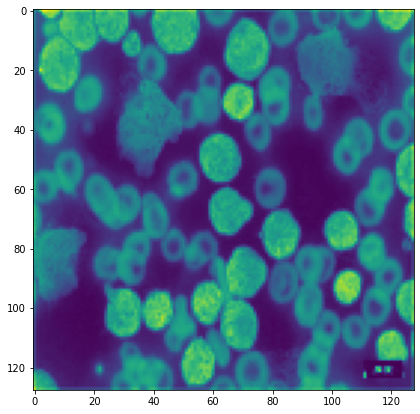

In [ ]:
plt.imshow(1-(x_test[11].reshape(128,128)-preds[11].reshape(128,128)))

Image - Mask - Sagmented Results

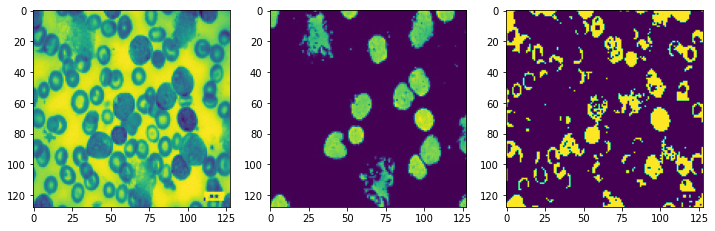

In [ ]:
plt.rcParams['figure.figsize']=(12,5)
plt.subplot(1,3,1)
plt.imshow((x_test[1].reshape(128,128)))
plt.subplot(1,3,2)
plt.imshow(y_test[1].reshape(128,128))
plt.subplot(1,3,3)
plt.imshow(np.round((preds[1].reshape(128,128)-x_test[1].reshape(128,128))))
plt.show()

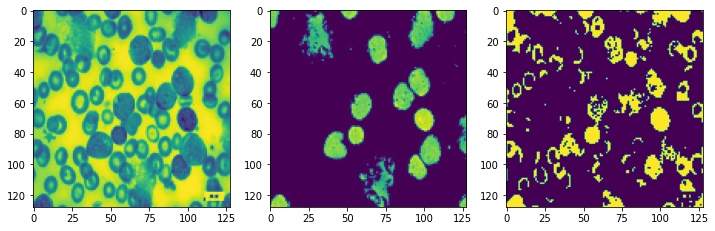

In [ ]:
plt.rcParams['figure.figsize']=(12,5)
plt.subplot(1,3,1)
plt.imshow(x_test[1].reshape(128,128))
plt.subplot(1,3,2)
plt.imshow(y_test[1].reshape(128,128))
plt.subplot(1,3,3)
plt.imshow(np.round(1-np.round((x_test[1].reshape(128,128)-preds[1].reshape(128,128)))*x_test[1].reshape(128,128)))
plt.show()

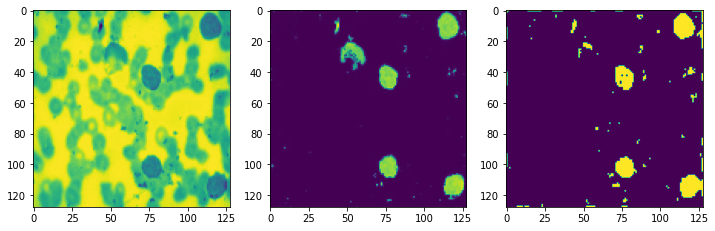

In [ ]:
plt.rcParams['figure.figsize']=(12,5)
plt.subplot(1,3,1)
plt.imshow(x_test[113].reshape(128,128))
plt.subplot(1,3,2)
plt.imshow(y_test[113].reshape(128,128))
plt.subplot(1,3,3)
plt.imshow(np.round(1-(x_test[113].reshape(128,128)-preds[113].reshape(128,128))))
plt.show()

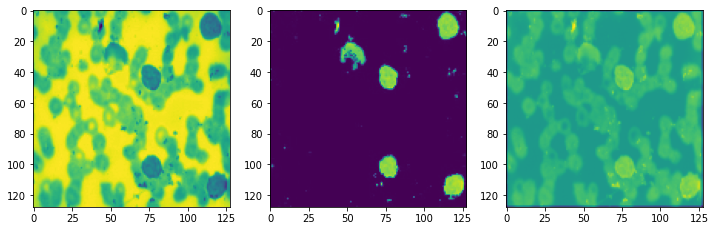

In [ ]:
plt.rcParams['figure.figsize']=(12,5)
plt.subplot(1,3,1)
plt.imshow(x_test[113].reshape(128,128))
plt.subplot(1,3,2)
plt.imshow(y_test[113].reshape(128,128))
plt.subplot(1,3,3)
plt.imshow((1-(x_test[113].reshape(128,128)*preds[113].reshape(128,128))))
plt.show()

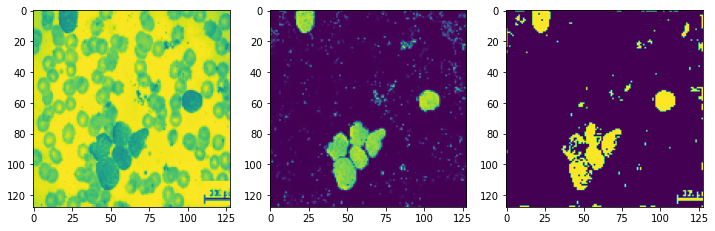

In [ ]:
plt.rcParams['figure.figsize']=(12,5)
plt.subplot(1,3,1)
plt.imshow(x_test[19].reshape(128,128))
plt.subplot(1,3,2)
plt.imshow(y_test[19].reshape(128,128))
plt.subplot(1,3,3)
plt.imshow(np.round(1-(x_test[19].reshape(128,128)-preds[19].reshape(128,128))))
plt.show()

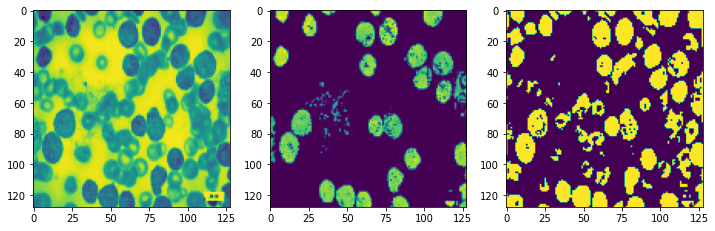

In [ ]:
plt.rcParams['figure.figsize']=(12,5)
plt.subplot(1,3,1)
plt.imshow(x_test[437].reshape(128,128))
plt.subplot(1,3,2)
plt.imshow(y_test[437].reshape(128,128))
plt.subplot(1,3,3)
plt.imshow(np.round(1-(x_test[437].reshape(128,128)-preds[437].reshape(128,128))))
plt.show()

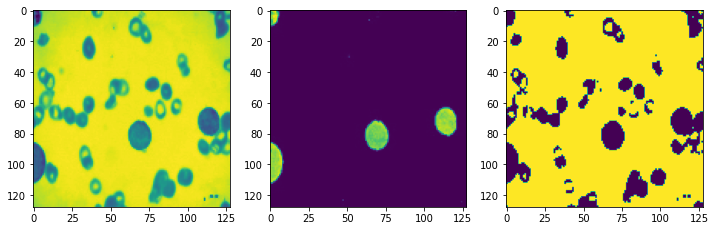

In [ ]:
plt.rcParams['figure.figsize']=(12,5)
plt.subplot(1,3,1)
plt.imshow(x_test[117].reshape(128,128))
plt.subplot(1,3,2)
plt.imshow(y_test[117].reshape(128,128))
plt.subplot(1,3,3)
plt.imshow(np.round(1-(preds[117].reshape(128,128)-x_test[117].reshape(128,128))))
plt.show()

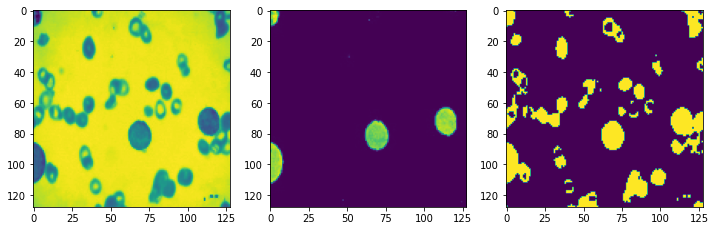

In [ ]:
plt.rcParams['figure.figsize']=(12,5)
plt.subplot(1,3,1)
plt.imshow(x_test[117].reshape(128,128))
plt.subplot(1,3,2)
plt.imshow(y_test[117].reshape(128,128))
plt.subplot(1,3,3)
plt.imshow(np.round(1-(x_test[117].reshape(128,128)-preds[117].reshape(128,128))))
plt.show()

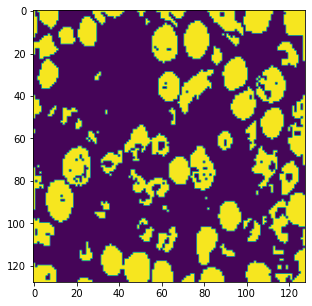

In [ ]:
kernel = np.array([[0, -1, 0],
                   [-1, 255,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=np.round(1-(x_test[437].reshape(128,128)-preds[437].reshape(128,128))), ddepth=-1, kernel=kernel)
plt.imshow(image_sharp)

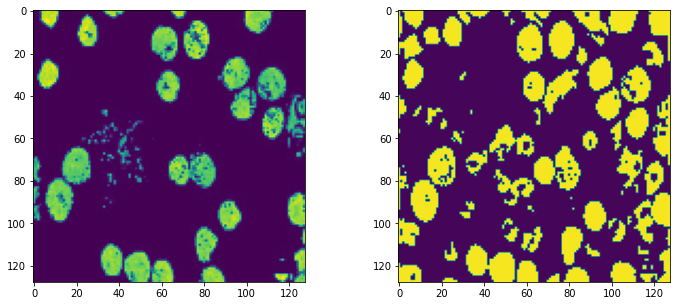

In [ ]:
kernel = np.array([[0, -1, 0],
                   [-1, 255,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=np.round(1-(x_test[437].reshape(128,128)-preds[437].reshape(128,128))), ddepth=-1, kernel=kernel)
plt.subplot(1,2,1)
plt.imshow(y_test[437].reshape(128,128))
plt.subplot(1,2,2)
plt.imshow(image_sharp)
plt.show()

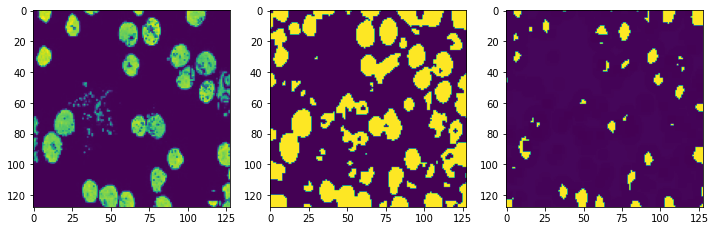

In [ ]:
blur = cv2.GaussianBlur(image_sharp,(5,5),0)
t = threshold_otsu(blur)
binary_mask = blur > t
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(image_sharp,kernel,iterations = 1)

plt.subplot(1,3,1)
plt.imshow(y_test[437].reshape(128,128))
plt.subplot(1,3,2)
plt.imshow(binary_mask)
plt.subplot(1,3,3)
plt.imshow(erosion)
plt.show()

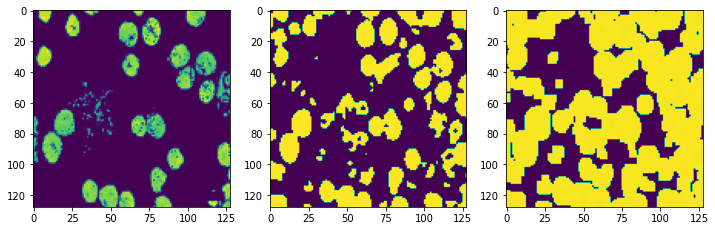

In [ ]:
dilation = cv2.dilate(image_sharp,kernel,iterations = 1)
plt.subplot(1,3,1)
plt.imshow(y_test[437].reshape(128,128))
plt.subplot(1,3,2)
plt.imshow(binary_mask)
plt.subplot(1,3,3)
plt.imshow(dilation)
plt.show()

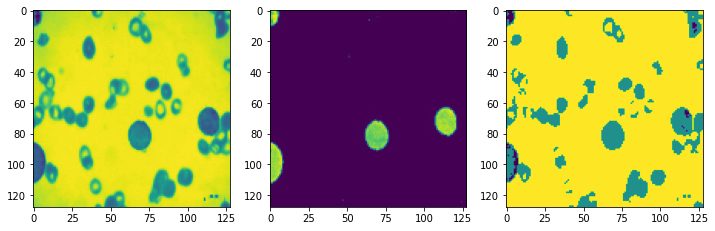

In [ ]:
msk=np.round(1-(preds[117].reshape(128,128)-x_test[117].reshape(128,128)))
plt.subplot(1,3,1)
plt.imshow(x_test[117].reshape(128,128))
plt.subplot(1,3,2)
plt.imshow(y_test[117].reshape(128,128))
plt.subplot(1,3,3)
plt.imshow(np.round(x_test[117].reshape(128,128)*msk))
plt.show()

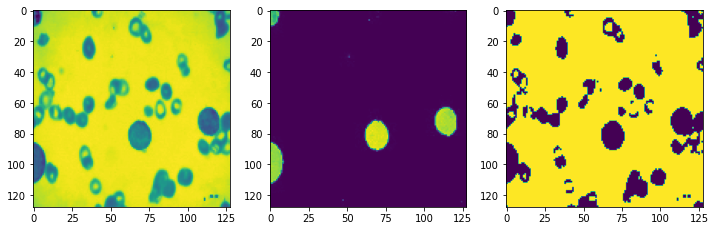

In [ ]:
plt.rcParams['figure.figsize']=(12,5)
plt.subplot(1,3,1)
plt.imshow(x_test[117].reshape(128,128))
plt.subplot(1,3,2)
plt.imshow(y_test[117].reshape(128,128)*x_test[117].reshape(128,128))
plt.subplot(1,3,3)
plt.imshow(np.round(1-(preds[117].reshape(128,128)-x_test[117].reshape(128,128))))
plt.show()

In [ ]:
from skimage.filters import threshold_otsu
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=np.round(1-(preds[224].reshape(128,128)-x_test[244].reshape(128,128))), ddepth=-1, kernel=kernel)

blur = cv2.GaussianBlur(image_sharp,(5,5),0)
t = threshold_otsu(blur)
binary_mask = blur > t
t

1.530426025390625

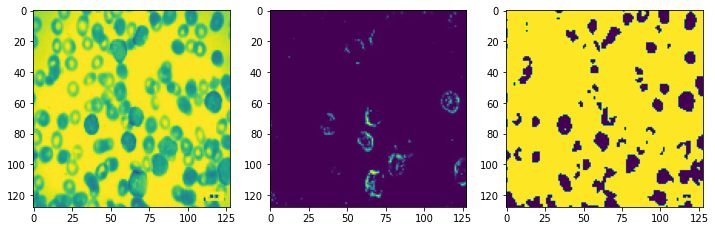

In [ ]:
plt.subplot(1,3,1)
plt.imshow(x_test[244].reshape(128,128))
plt.subplot(1,3,2)
plt.imshow(y_test[244].reshape(128,128))
plt.subplot(1,3,3)
plt.imshow(binary_mask)
plt.show()

1.5090713500976562


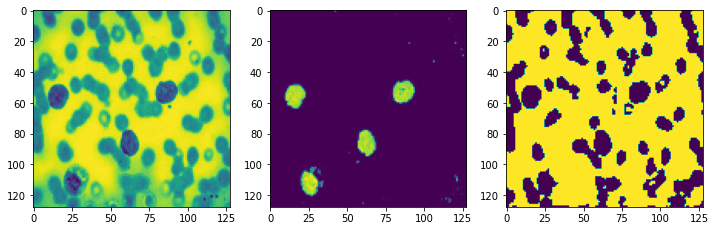

In [ ]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=np.round(1-(preds[500].reshape(128,128)-x_test[500].reshape(128,128))), ddepth=-1, kernel=kernel)
blur = cv2.GaussianBlur(image_sharp,(5,5),0)
t = threshold_otsu(blur)
binary_mask = blur > t
print(t)
plt.subplot(1,3,1)
plt.imshow(x_test[500].reshape(128,128))
plt.subplot(1,3,2)
plt.imshow(y_test[500].reshape(128,128))
plt.subplot(1,3,3)
plt.imshow(binary_mask)
plt.show()

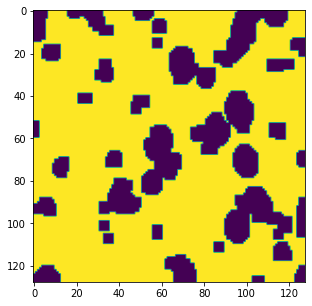

In [ ]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(np.round(1-(preds[1].reshape(128,128)-x_test[1].reshape(128,128))),kernel,iterations = 1)
closing = cv2.morphologyEx(np.round(1-(preds[1].reshape(128,128)-x_test[1].reshape(128,128))), cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

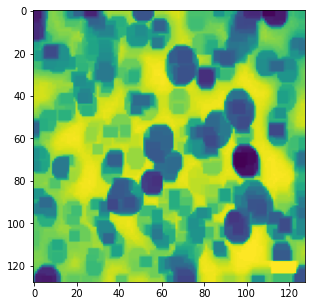

In [ ]:
closing = cv2.morphologyEx(x_test[1].reshape(128,128), cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

In [ ]:
element = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
mask = cv2.filter2D(src=np.round(1-(x_test[437].reshape(128,128)-preds[437].reshape(128,128))), ddepth=-1, kernel=kernel)
mask = cv2.erode(mask, element, iterations = 1)
mask = cv2.dilate(mask, element, iterations = 1)
mask = cv2.erode(mask, element)

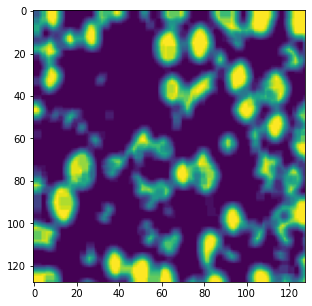

In [ ]:
plt.imshow(mask)

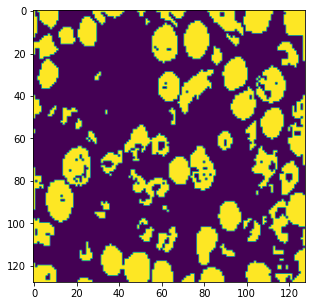

In [ ]:
from skimage import morphology
binarized = np.where(np.round(1-(x_test[437].reshape(128,128)-preds[437].reshape(128,128)))>0.1, 1, 0)
processed = morphology.remove_small_objects(binarized.astype(bool), min_size=2, connectivity=2).astype(int)
plt.imshow(processed)

In [ ]:
keras.losses.BinaryCrossentropy()(processed,y_test[437].reshape(128,128))

<tf.Tensor: shape=(), dtype=float64, numpy=1.8676128387451172>

In [ ]:
kernel = np.ones((7,7),np.uint8)
closing = cv2.morphologyEx(np.round(1-(preds[117].reshape(128,128)-x_test[117].reshape(128,128))), cv2.MORPH_CLOSE, kernel)

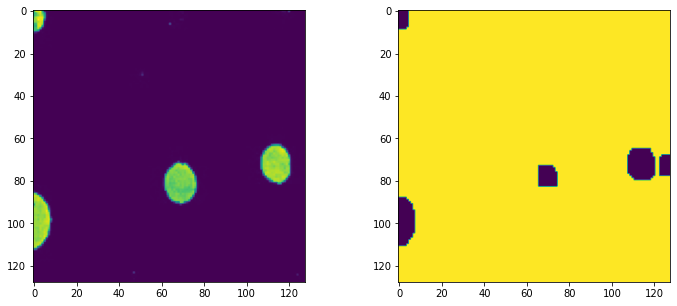

In [ ]:
plt.subplot(1,2,1)
plt.imshow(y_test[117].reshape(128,128))
plt.subplot(1,2,2)
plt.imshow(closing)
plt.show()

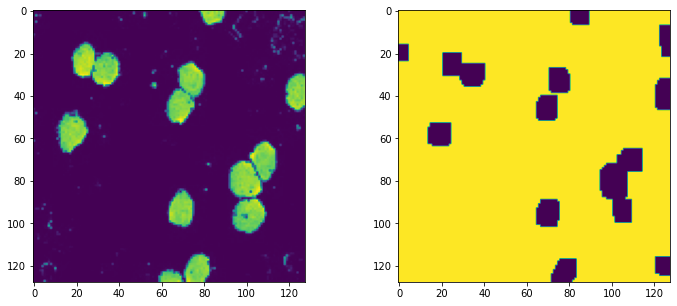

In [ ]:
kernel = np.ones((8,8),np.uint8)
closing = cv2.morphologyEx(np.round(1-(preds[227].reshape(128,128)-x_test[227].reshape(128,128))), cv2.MORPH_CLOSE, kernel)
plt.subplot(1,2,1)
plt.imshow(y_test[227].reshape(128,128))
plt.subplot(1,2,2)
plt.imshow(closing)
plt.show()

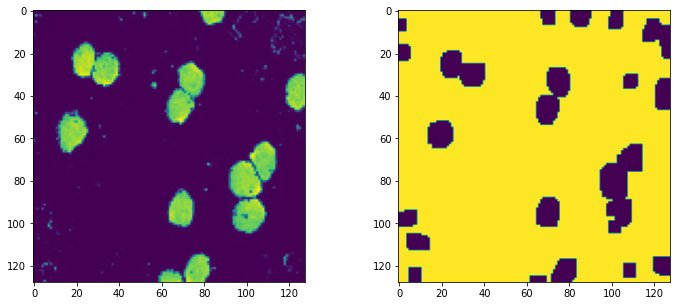

In [ ]:
kernel = np.ones((6,6),np.uint8)
closing = cv2.morphologyEx(np.round((x_test[227].reshape(128,128)-preds[227].reshape(128,128))), cv2.MORPH_CLOSE, kernel)
plt.subplot(1,2,1)
plt.imshow(y_test[227].reshape(128,128))
plt.subplot(1,2,2)
plt.imshow((closing))
plt.show()

In [ ]:
keras.losses.BinaryCrossentropy()(y_test[227].reshape(128,128),closing)

<tf.Tensor: shape=(), dtype=float64, numpy=14.344697952270508>

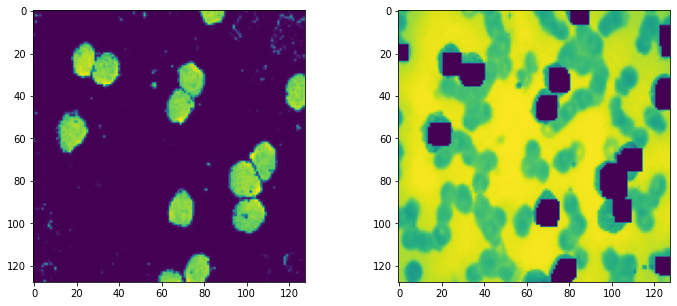

In [ ]:
plt.subplot(1,2,1)
plt.imshow((y_test[227].reshape(128,128)))
plt.subplot(1,2,2)
plt.imshow((x_test[227].reshape(128,128)*closing))